In [1]:
import math
import numpy as np
import scipy as sc
from scipy import integrate
from scipy import stats
from scipy import optimize


import scipy.misc
import matplotlib.pyplot as plt

def divide(a,b,n):
    ret=[]
    for i in range(n+1):
        ret.append(a+(i*(b-a))/n)
    return ret


$ \int_0^1 e^{-2x}dx= -\frac{1}{2}e^{-2x}|^1_0 = \frac{1}{2}(1-\frac{1}{e^2}) = 0.43233235838169365$


In [2]:
#zadanie 1

def f(x):
    return math.exp(-2*x)

a=0
b=1
n=10 # tyle podprzedziałów

## 1
print("\n1. Metoda analityczna, wzór u góry")
S=(1/2)*(1-1/(math.e)**2)
print(S)

## 2
print ("\n2. Metoda prostokątów")

S=(b-a)*f((a+b)/2)
print(S)

## 3
print ("\n3. Prosty wzór trapezów")
S=((b-a)/2)*(f(a)+f(b))
print(S)

## 4
print ("\n4. Prosty wzór Simpsona")
S=((b-a)/6)*(f(a)+4*f((a+b)/2) + f(b))
print(S)

## 5
print ("\n5. Złożony wzór trapezów")
x=divide(0,1,10)
S=0;
for i in range (len(x)-1):
    S+= ((x[i+1]-x[i])/2)*(f(x[i])+f(x[i+1]))
print(S)

## 6
print ("\n6. Złożony wzór Simpsona")
x=divide(0,1,10)
S=0;
for i in range (len(x)-1):
    S+= ((x[i+1]-x[i])/6)*(f(x[i])+  4*f((x[i]+x[i+1])/2) + f(x[i+1]))
print(S)


## 7
print ("\n7. Metoda Romberga ")
S=sc.integrate.romberg(f,a,b,tol=10**(-6))
print(S)

## 8
print("\n8. Metoda scipy.integrate.quad")
S=sc.integrate.quad(f,a,b)[0]
print(S)


print("\nNajbardziej zbliżone wyniki do analitycznego dają funkcje biblioteczne, czyli .romberg oraz .quad oraz złożony wzór Simpsona, gdyż Simpson przybliża funkcję wieloma parablami, które są podobne do funkcji wykładniczej")
print("")


1. Metoda analityczna, wzór u góry
0.43233235838169365

2. Metoda prostokątów
0.36787944117144233

3. Prosty wzór trapezów
0.5676676416183064

4. Prosty wzór Simpsona
0.4344755079870637

5. Złożony wzór trapezów
0.43377250641846693

6. Złożony wzór Simpsona
0.43233259828070303

7. Metoda Romberga 
0.43233235838943557

8. Metoda scipy.integrate.quad
0.4323323583816936

Najbardziej zbliżone wyniki do analitycznego dają funkcje biblioteczne, czyli .romberg oraz .quad oraz złożony wzór Simpsona, gdyż Simpson przybliża funkcję wieloma parablami, które są podobne do funkcji wykładniczej



In [13]:
# zadanie 2

def trapezy(f, a, b, n):
    x=divide(a,b,n)
    wynik=0
    for i in range (len(x)-1):
        wynik+= ((x[i+1]-x[i])/2)*(f(x[i])+f(x[i+1]))
    return wynik

def simpsony(f, a, b, n):
    x=divide(a,b,n)
    wynik=0
    for i in range (len(x)-1):
        wynik+= ( (x[i+1]-x[i]) / 6 ) * (f(x[i])+  4*f((x[i]+x[i+1])/2) + f(x[i+1]))
    return wynik

def f_pom(t):
    return math.exp((-t**2)/2)/math.sqrt(2*math.pi)

def pom_trap(x):
    return trapezy(f_pom, 0, x,100)-0.45

def sim_trap(x):
    return simpsony(f_pom, 0, x,100)-0.45


wr=sc.stats.norm.ppf(0.95)
print("\nWartość referencyjna: ", wr)

tr= sc.optimize.newton(pom_trap,0.5,f_pom)
sp= sc.optimize.newton(sim_trap,0.5,f_pom)

print ("\nWynik z trapezów: ", tr, ", błąd: ", abs(wr-tr))
print ("Wynik z simpsona: ", sp, ", błąd: ", abs(wr-sp))





Wartość referencyjna:  1.6448536269514722

Wynik z trapezów:  1.6448907135693658 , błąd:  3.7086617893589136e-05
Wynik z simpsona:  1.6448536269391654 , błąd:  1.230682222796986e-11


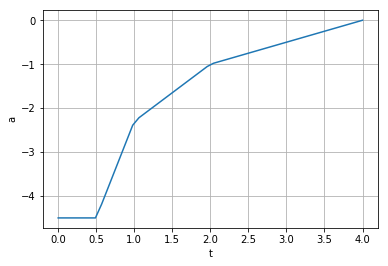

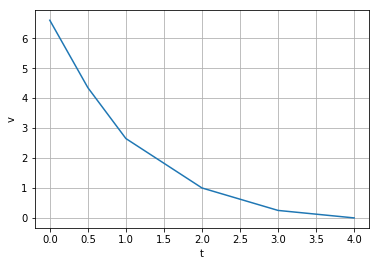

Kierowca przebył drogę  7.062500000000001 m
średnia predkość w przedziale czasowym t=[0,0.5] to  4.4999999999999964 m/s


In [4]:
# zadanie 3

t_tab=[0, 0.5, 1, 2, 3, 4]
a_tab=[-4.5, -4.5, -2.3, -1.0, -0.5, 0]

f_a=sc.interpolate.interp1d(t_tab,a_tab,'linear')
x=np.linspace(0,4)
a=f_a(x)


plt.plot(x,a)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('a')
plt.show()

v_tab=[]
for i in range(len(t_tab)-1,-1,-1):
    v_tab.insert(0, sc.integrate.quad(f_a, 4, t_tab[i])[0])
    
f_v=sc.interpolate.interp1d(t_tab,v_tab,'linear')
plt.plot(t_tab,v_tab)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

s_0=sc.integrate.quad(f_v, t_tab[0],4)[0]
v_sr = (v_tab[0]-v_tab[1])/0.5

print("Kierowca przebył drogę ", s_0, "m")
print("średnia predkość w przedziale czasowym t=[0,0.5] to ", v_sr, "m/s")




Metoda .romberg:  15.825159885482952
Metoda .quad dla porównania:  11.055475108049423
Trapezy:  11.063484780895658
Simpsony:  11.063484780895655


/home/dk/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


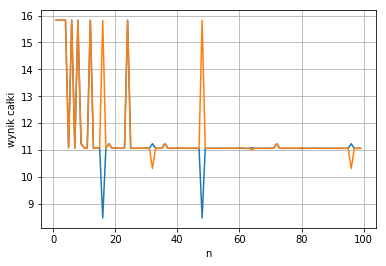

Jak widzimy działania dla danej funkcji są niestabilne, występują wysokie błędy numeryczne w niektórych miejscach.


In [5]:
# zadanie 4

def f(x): #x podane w metrach
    return 0.1*math.sin(10*math.pi*x)

def f_prim(x):
    return math.pi*math.cos(10*math.pi*x)

def f_pom(x):
    return math.sqrt(1+math.pow( f_prim(x), 2))

a=0
b=4.8

L_romberg=sc.integrate.romberg(f_pom,a,b,tol=10**(-6))
print("Metoda .romberg: ",L_romberg)

print("Metoda .quad dla porównania: ", sc.integrate.quad(f_pom,a,b)[0])

def trapezy(f, a, b, n):
    x=divide(a,b,n)
    wynik=0
    for i in range (len(x)-1):
        wynik+= ((x[i+1]-x[i])/2)*(f(x[i])+f(x[i+1]))
    return wynik

def simpsony(f, a, b, n):
    x=divide(a,b,n)
    wynik=0
    for i in range (len(x)-1):
        wynik+= ( (x[i+1]-x[i]) / 6 ) * (f(x[i])+  4*f((x[i]+x[i+1])/2) + f(x[i+1]))
    return wynik

#trapezów
print("Trapezy: ", trapezy(f_pom,a,b,100))

# Simpsona
print("Simpsony: ", simpsony(f_pom,a,b,100))


zakres=range(1,100)
w_simps=[]
w_trap=[]

for i in zakres:
    w_simps.append(simpsony(f_pom,a,b,i))
    w_trap.append(trapezy(f_pom,a,b,i))


plt.plot(zakres,w_simps)
plt.plot(zakres,w_trap)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('wynik całki')
plt.show()

print("Jak widzimy działania dla danej funkcji są niestabilne, występują wysokie błędy numeryczne w niektórych miejscach.")